## Bank Marketing Analysis
### Shimaa Hamadelnel

## **Introduction**
This document details the exploration and modeling of a dataset related to a direct marketing campaign by a Portuguese banking institution. The dataset contains 17 attributes describing various demographics and financial characteristics of individuals involved in the campaign, such as age, job, marital status, and education. Our objective is to build a model that predicts whether an individual will subscribe to a term deposit based on these attributes.
### **Business problem** :
- The goal is to classify whether potential customers will be persuaded to become customers of a bank?

**The steps** **:**

- Dataset: We'll utilize the publicly available dataset from the UCI Machine Learning Repository [Bank Marking](https://archive.ics.uci.edu/dataset/222/bank+marketing).

- Exploratory Data Analysis (EDA): It is a crucial step in the data analysis process. It helps to understand the structure, relationships, and patterns within the dataset before diving into modele bulding.

- Model Building:  We'll construct three distinct models using different machine learning algorithms:
1. Decision Tree
1. Random Forest
1. Logistic Regression

- Model Evaluation & Comparison: Each model's performance will be meticulously evaluated, allowing us to identify the most effective model for predicting customer behavior in this specific scenario.

- Hyperparameter Tuning: We'll further refine the chosen model by optimizing its hyperparameters using GridSearch, a technique for efficiently exploring a predefined set of hyperparameter values.

- Prediction: Finally, we'll leverage the optimized model to generate predictions on the dataset.

### Import the dataset
Before delving into the specifics of our dataset, it's essential to grasp its entirety, avoiding any segmentation into training and testing sets to draw unified insights. Once we've ingested the data into a structured format like a Pandas DataFrame, our analytical journey commences. by use read fuction we are able to import the data.



In [90]:
import pandas as pd

df = pd.read_csv(r'C:\Users\yahya\Downloads\bank+marketing\bank\bank-full.csv', sep=';')

In [91]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Data Cleaning and Pre-processing

- Starting the journey of model development requires careful handling of data loading and pre-processing. This initial phase is crucial, laying the groundwork for an environment that supports effective learning for the model. It's well-known that the quality of training data directly impacts a model's performance. Therefore, meticulous attention to detail during data pre-processing is essential.
- Understanding the essence and composition of our dataset is paramount. We initiate this by examining its dimensions and data types. The shape() attribute provides us with the structure's dimensions, while the info() function furnishes insights into the data's nature, including its types and the quantity of non-null entries.


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [93]:
# the data dimensions  (45211 rows, 17 columns)
df.shape

(45211, 17)

### Information about the numerical values

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Observations
- **Contact Date Distribution:** The majority of clients have been contacted by the 21st day of the month, indicating a concentrated effort towards the beginning of the month. This could be due to specific marketing or outreach strategies targeting clients early in the month.

- **Age Distribution:** About 75% of clients fall within the age range of 18 to 48 years old. This suggests that the campaign or service being offered may appeal more to younger or middle-aged demographics. Understanding the age distribution can help tailor marketing strategies and product offerings to better suit the target audience.

- **Contact Frequency:** On average, clients have been contacted at least once, with an average of 3 contacts per client. However, there are outliers in the data, with some clients receiving a much higher number of contacts, up to a maximum of 63. These outliers may represent specific cases where repeated contact was necessary or instances of data entry errors. Further investigation into these outliers may provide insights into the effectiveness of the contact strategy and potential areas for improvement.

### Information about the cateogrical columns

In [95]:
df.describe(include=object).T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [96]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('***'*10)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
******************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
******************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
******************************
no     44396
yes      815
Name: default, dtype: int64
******************************
yes    25130
no     20081
Name: housing, dtype: int64
******************************
no     37967
yes     7244
Name: loan, dtype: int64
******************************
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
******************************
may    13766
jul     6895
aug     6247
jun     5341
nov     397

### Observations

**Job Distribution:** The dataset indicates that approximately 21% of the total clients are employed in blue-collar occupations, making it the most common job category. This is followed by management and administration roles, while the least common occupation among clients is students. Additionally, around half of the clients possess a secondary education level.

**Credit Default:** It appears that the vast majority, around 98%, of the customers do not have credit in default accounts, indicating a relatively low default rate among the client base.

**Housing and Personal Loans:** Housing loans are more prevalent among clients, with approximately 56% having such loans, while personal loans are less common, with only about 16% of clients having them.

**Contact Preferences:** The data suggests that about 65% of clients prefer to be contacted via their cellphones, indicating a preference for mobile communication channels.

**Contact Frequency by Month:** There seems to be a noticeable spike in the number of contacts made during the month of May. This could be attributed to various factors, such as seasonality or specific marketing campaigns planned for that period, which is logical as it precedes the fiscal year.

**Outcome of Previous Marketing Campaign (poutcome):** A significant portion of the data (around 82%) in the column representing the outcome of the previous marketing campaign is labeled as unknown. Only a small fraction (approximately 3%) of the records indicate a successful outcome from the previous campaign, suggesting room for improvement in campaign effectiveness or data collection methods.

**Subscription to Term Deposit:** The data reveals that approximately 12% of clients have subscribed to a term deposit, while the remaining 88% have not. This indicates a relatively low uptake of term deposits among the client base.

In [97]:
#change the duration to mintes and drop the orignal column
df['duration_minutes'] = df['duration'] / 60

In [98]:
#Drop the original column
df= df.drop(columns=['duration'])

In [99]:
#Lets see the data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.000000,39.0,48.000000,95.000000
balance,45211.0,1362.272058,3044.765829,-8019.0,72.000000,448.0,1428.000000,102127.000000
day,45211.0,15.806419,8.322476,1.0,8.000000,16.0,21.000000,31.000000
campaign,45211.0,2.763841,3.098021,1.0,1.000000,2.0,3.000000,63.000000
pdays,45211.0,40.197828,100.128746,-1.0,-1.000000,-1.0,-1.000000,871.000000
previous,45211.0,0.580323,2.303441,0.0,0.000000,0.0,0.000000,275.000000
duration_minutes,45211.0,4.302718,4.292130,0.0,1.716667,3.0,5.316667,81.966667


**Call duration:** It seems that the average duration of a call in your dataset is around 4 minutes, which indicates the typical length of interactions with clients. However, there is an outlier in the data where the maximum call duration lasted for 81 minutes. This unusually long call duration may represent an exceptional case or anomaly that requires further investigation.
Such outliers could be due to various reasons, including:

- In-depth Consultations: Some clients may require extensive consultation or assistance, leading to longer call durations.
- Technical Issues: Extended call durations could also result from technical difficulties or system errors encountered during the conversation.
- Data Entry Errors: Occasionally, outliers may occur due to data entry errors, where the call duration is incorrectly recorded.

Indeed, the insights gained from the observations so far can guide us in identifying columns that may not contribute significantly to our target column or may contain irrelevant or redundant information. Dropping such columns can help streamline our analysis and improve the efficiency of our models. 
- **Irrelevant Columns:** Columns like 'day' & 'contact' that do not directly relate to the target variable or provide meaningful insights can be considered for removal.
- **Garbage Value Columns:** Columns that predominantly contain garbage values or unknown entries, as observed in the 'poutcome' column, may not be informative for our analysis. If a large proportion of the data in such columns is irrelevant or uninterpretable, it may be beneficial to drop these columns to avoid noise in our analysis.

In [100]:
#drop the day of the month coloumn
df= df.drop(columns=['day'])

In [101]:
#drop contact coloumn
df = df.drop(columns=['contact'], axis=1)

In [102]:
#drop poutcome coloumn
df = df.drop(columns=['poutcome'], axis=1)

### Data visualization

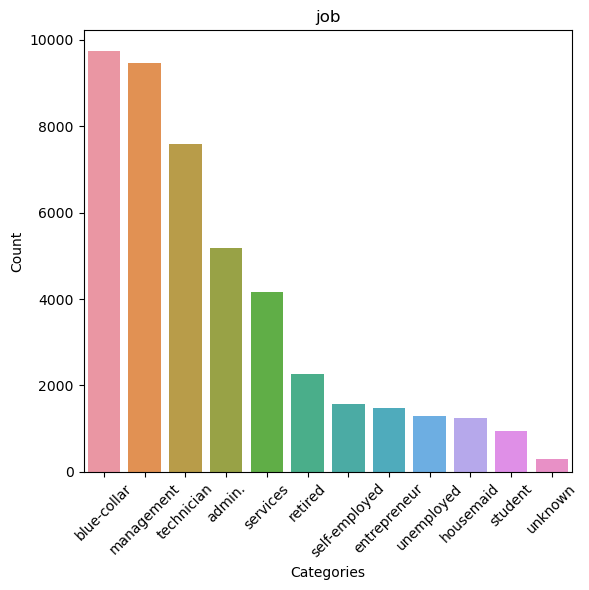

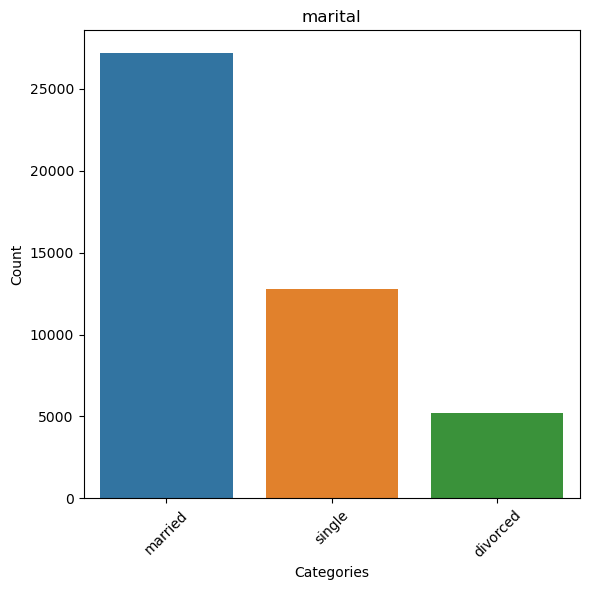

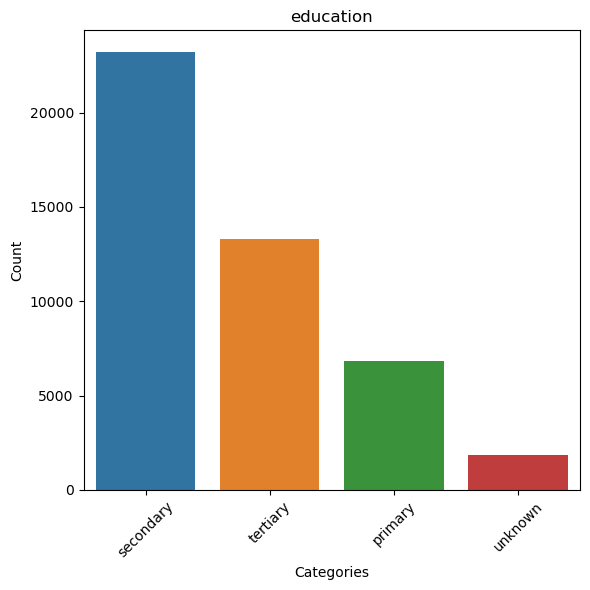

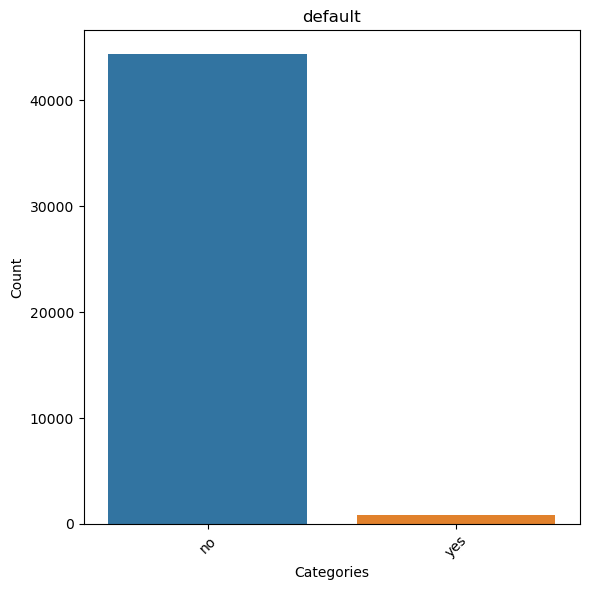

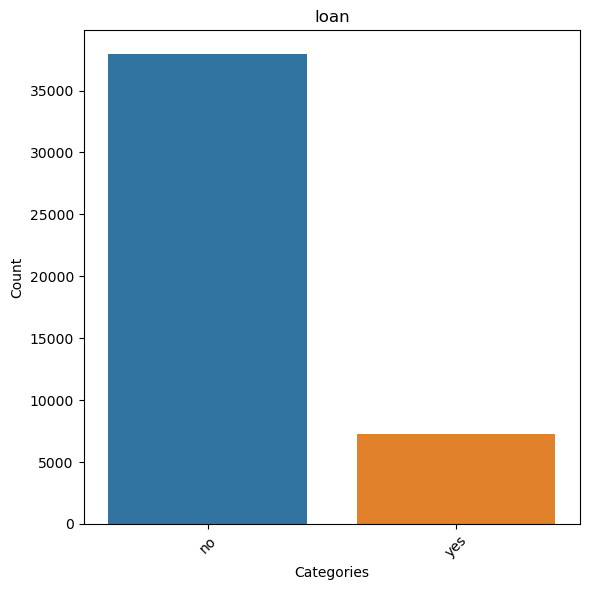

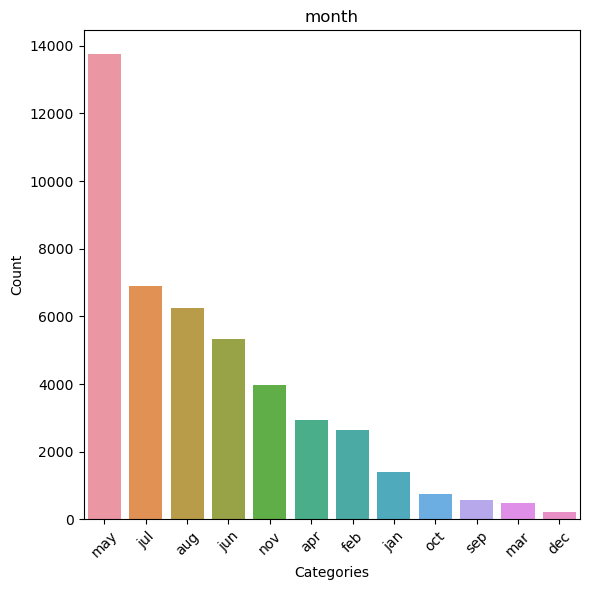

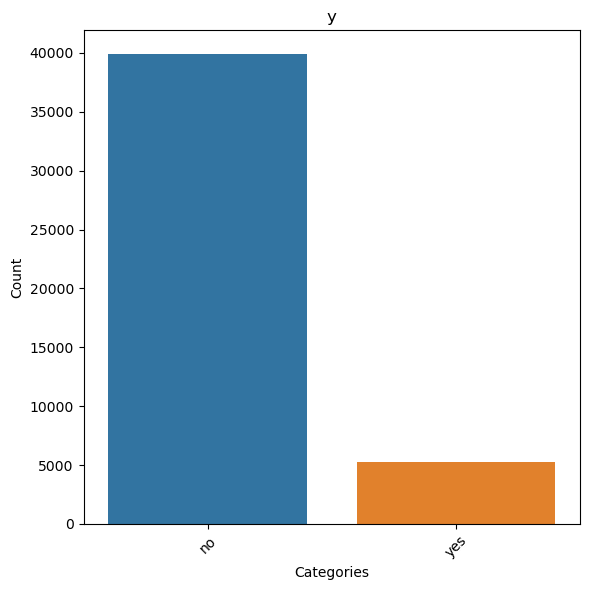

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_variables = ['job', 'marital', 'education', 'default', 'loan', 'month', 'y']

for col in categorical_variables:
    plt.figure(figsize=(6, 6))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.show()



### **Handling Missing Values**

In certain cases, our dataset may contain missing values within specific columns. These gaps in the data could arise due to various factors, including human error during data collection or transmission. To address this issue, we can leverage the is_null() function available in the Pandas library. This function enables us to identify any missing data within the dataset. Subsequently, by utilizing the sum() function, we can determine the total number of missing values present in each column. This systematic approach empowers us to proactively manage missing data, thereby ensuring the integrity and reliability of our dataset for subsequent analyses or model training processes.

 The data doesn't contain missing values. 

In [104]:
df.isnull().sum()

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
month               0
campaign            0
pdays               0
previous            0
y                   0
duration_minutes    0
dtype: int64

### Handling Duplicates 
address this issue, it's essential to implement strategies for identifying and managing duplicate records effectively.By utilize Pandas' duplicated(), we can see that the date dosn't contain any duplicates.

In [105]:
df.duplicated().sum()

0

### Analysis of univariate variables

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the numerical columns
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'duration_minutes'], dtype='object')

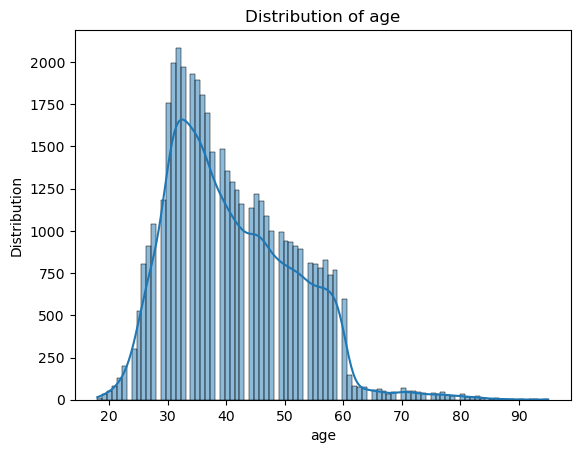

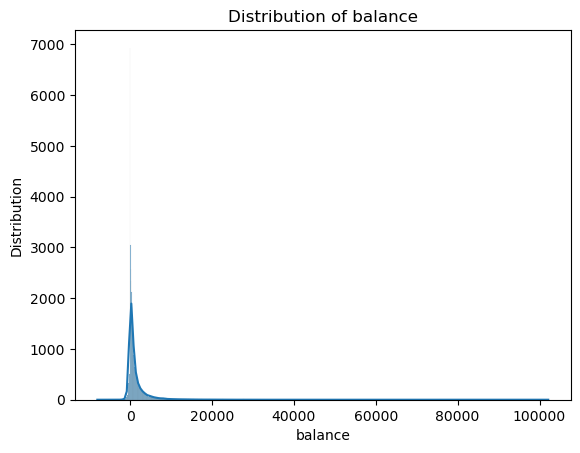

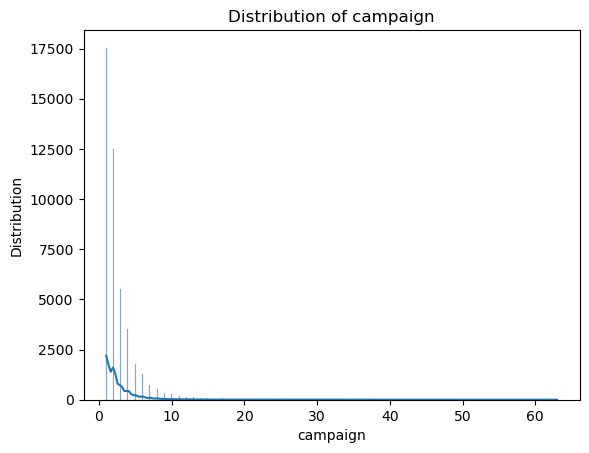

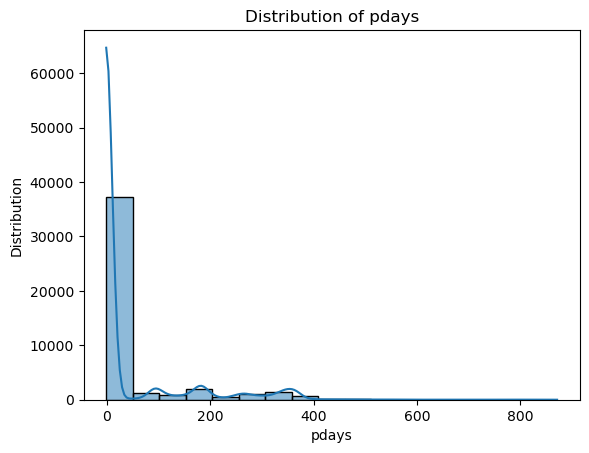

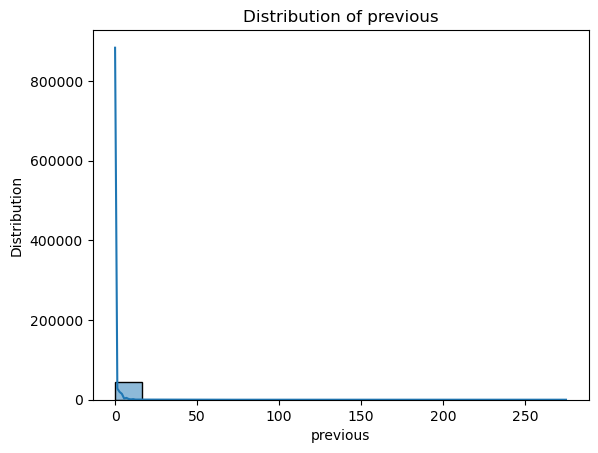

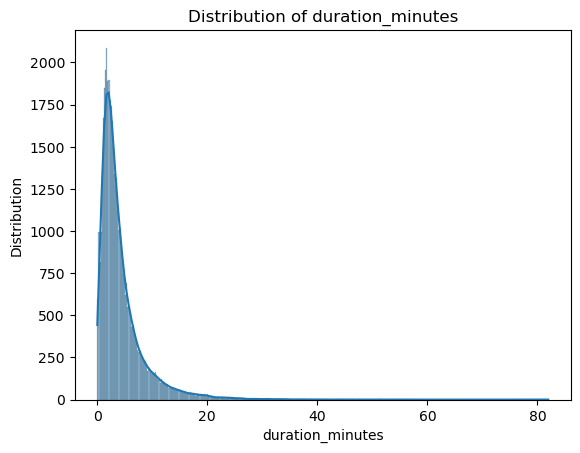

In [107]:
# Loop through the columns and create histograms
for col in numeric_cols:
  sns.histplot(data=df, x=col, kde=True)  # Add kernel density estimation for smoother curve (optional)
  plt.xlabel(col)  # Set the x-axis label to the current column name
  plt.ylabel('Distribution')  # Set the y-axis label
  plt.title(f"Distribution of {col}")  # Add an informative title
  plt.show()
  plt.close()  # Clear the plot to avoid overlapping plots


### checking the outliers

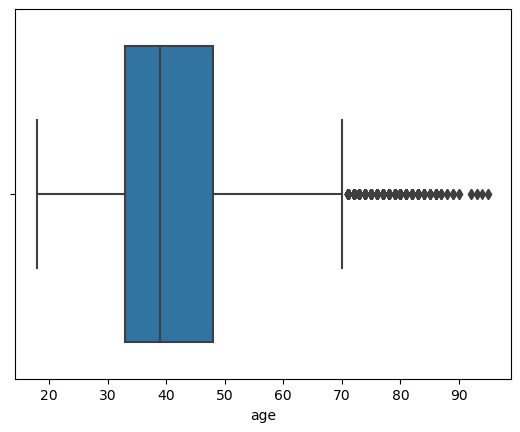

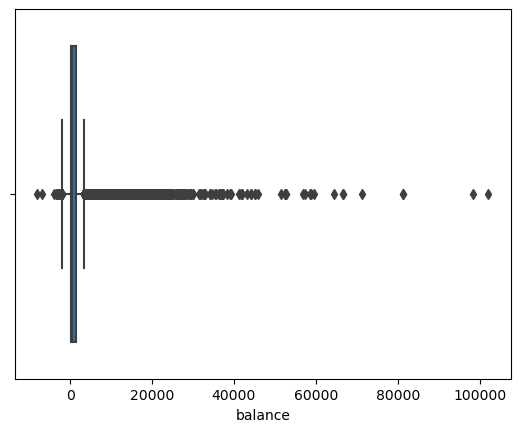

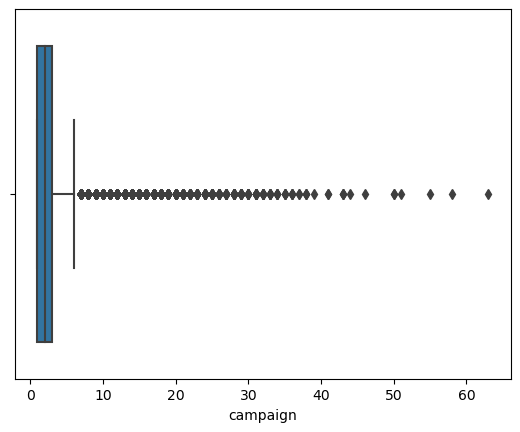

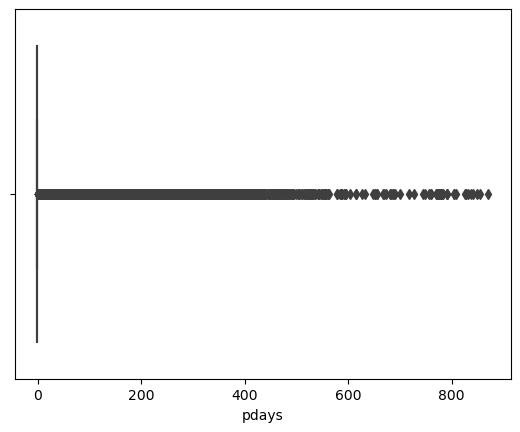

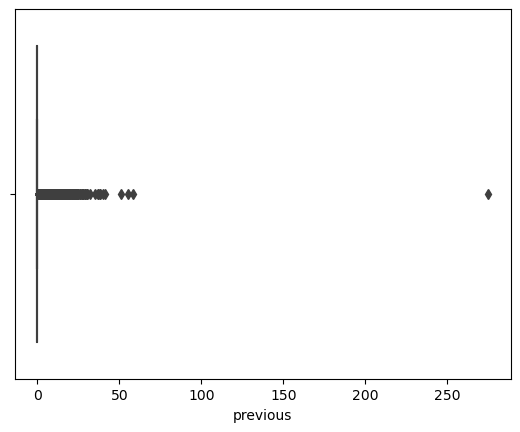

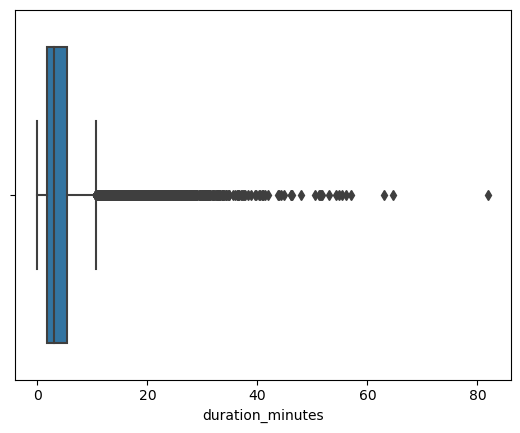

In [108]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

### Observations of the Numeric Column Distributions
**Age:**
- The distribution of age appears to be approximately normally distributed, with a slight skewness towards older ages. This suggests that the majority of clients are evenly distributed across different age groups, with a relatively smaller proportion of younger clients.

**Balance:**
- The distribution of account balances exhibits a right-skewed pattern, indicating that a significant number of clients have lower balances, while a few clients have much higher balances. This suggests that the majority of clients have relatively lower account balances, with a smaller proportion of clients having substantial savings or investments.

**Campaign:**
- The distribution of campaign contacts (campaign) appears to be highly right-skewed, with a longer tail on the right side. This suggests that the majority of clients were contacted a small number of times during the campaign, while a few clients were contacted a significantly higher number of times. This could indicate targeted follow-up efforts or attempts to engage specific clients more extensively.

**Pdays:**
- The distribution of days since the client was last contacted (pdays) also exhibits a right-skewed pattern, indicating that a large proportion of clients were not contacted recently, with a few clients being contacted more recently. This suggests that there may be periods of inactivity between contact attempts or that certain clients are targeted more frequently than others.

**Previous:**
- The distribution of previous contacts (previous) is highly right-skewed, indicating that most clients have had a relatively low number of previous contacts, while a few clients have had a significantly higher number of previous contacts. This suggests that the majority of clients have not been contacted extensively in previous campaigns, with only a small subset of clients having been engaged multiple times.

**Duration_minutes:**
- The distribution of call durations (duration_minutes) also appears to be right-skewed, with a longer tail on the right side. This suggests that most calls have relatively shorter durations, with a few calls lasting significantly longer. This could indicate variations in the nature of client interactions, with some requiring more extensive discussions or consultations.

Overall, these observations highlight the presence of right-skewed distributions in most numeric columns, indicating asymmetry and the presence of outliers or extreme values in the data. Understanding these distribution patterns is essential for interpreting the characteristics and behaviors of clients and informing data-driven decision-making processes.

### Analysis of multivariate variables

In [109]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'y'],
      dtype='object')

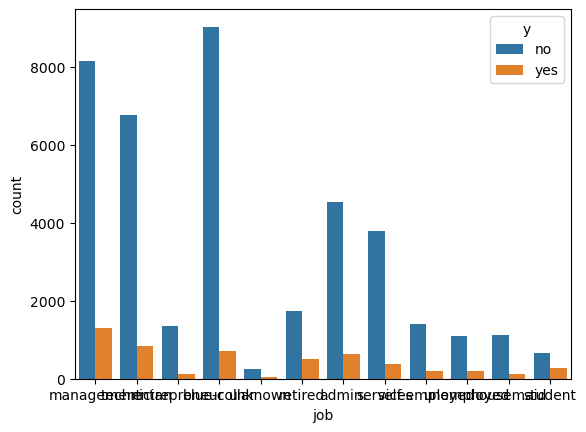

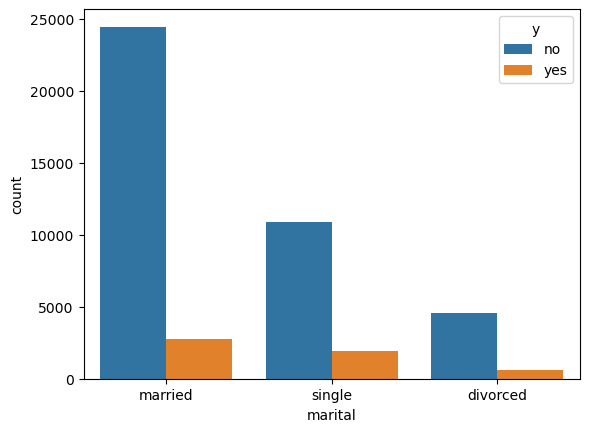

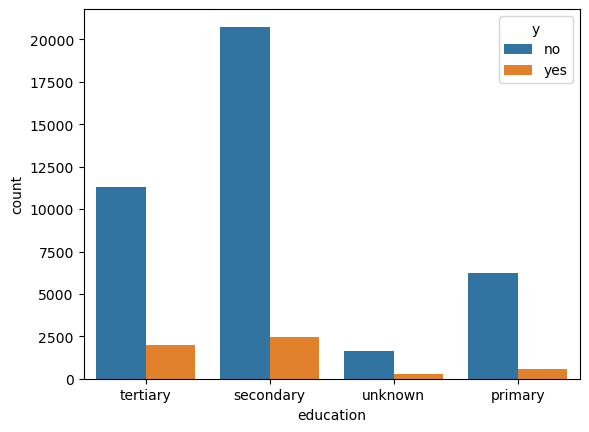

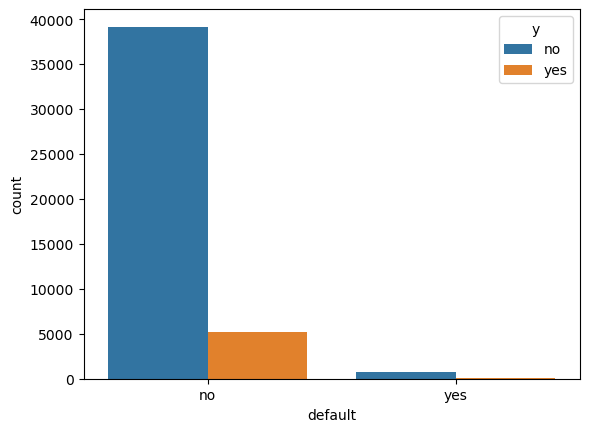

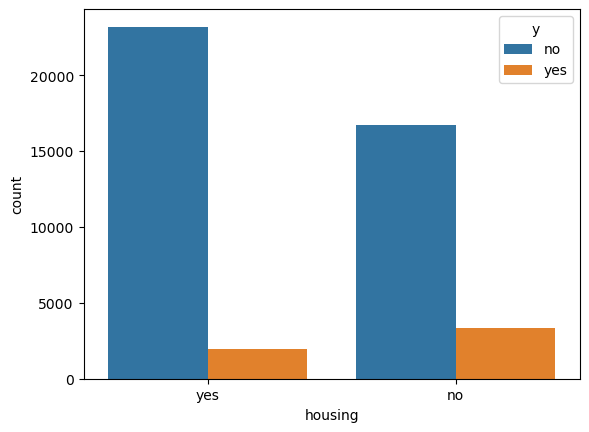

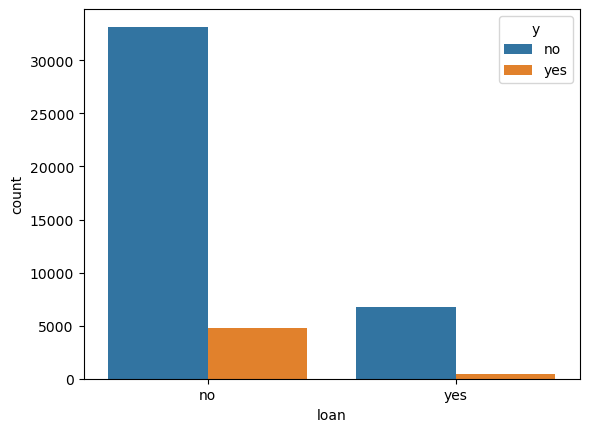

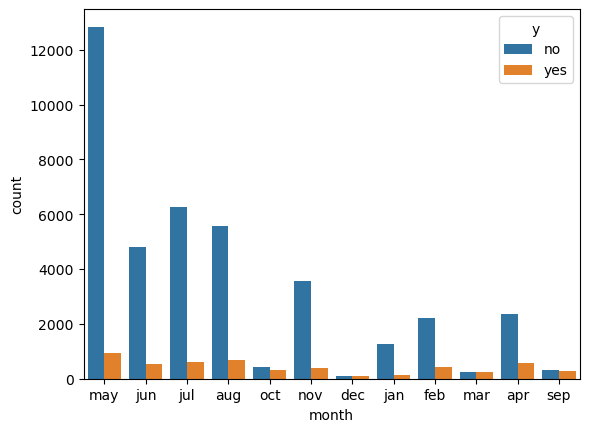

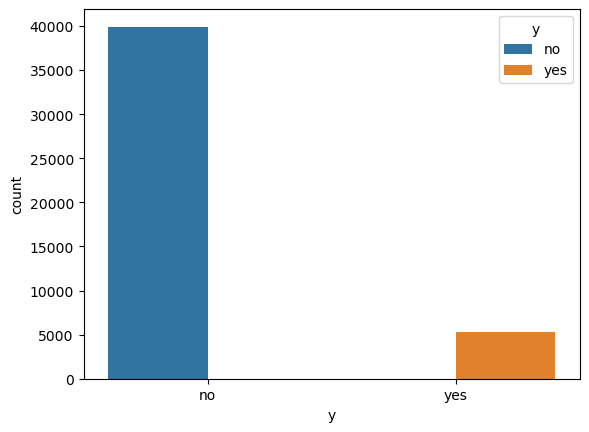

In [110]:
import matplotlib.pyplot as plt

for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'y']:
    sns.countplot(data= df, x=i, hue='y')
    plt.show()

In [111]:
df.select_dtypes(include='number').corr()

,age,balance,campaign,pdays,previous,duration_minutes
age,1.000000,0.097783,0.004760,-0.023758,0.001288,-0.004648
balance,0.097783,1.000000,-0.014578,0.003435,0.016674,0.021560
campaign,0.004760,-0.014578,1.000000,-0.088628,-0.032855,-0.084570
pdays,-0.023758,0.003435,-0.088628,1.000000,0.454820,-0.001565
previous,0.001288,0.016674,-0.032855,0.454820,1.000000,0.001203
duration_minutes,-0.004648,0.021560,-0.084570,-0.001565,0.001203,1.000000


Correlation Matrix
Range: [-1, 1]

1. No correlaiton r=0
1. Very weak correlation: r<20
1. Weak correlation: between 0.20-0.49
1. Moderate correlation: between 0.5-0.79
1. Strong correlation: between 0.8-0.99
1. Perfect correlation: r=1
- There is a weak correlation between the 'pdays' and 'previous' columns. However, aside from this weak correlation, our data does not exhibit any significant correlations between other variables.

### Changing categorical variable to numerical variable

### Encoding the categorical variable

In [112]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['marital'] = le.fit_transform(df['marital'])
df['job'] = le.fit_transform(df['job'])
df['education'] = le.fit_transform(df['education'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['default'] = le.fit_transform(df['default'])
df['month'] = le.fit_transform(df['month'])
df['y'] = le.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,y,duration_minutes
0,58,4,1,2,0,2143,1,0,8,1,-1,0,0,4.350000
1,44,9,2,1,0,29,1,0,8,1,-1,0,0,2.516667
2,33,2,1,1,0,2,1,1,8,1,-1,0,0,1.266667
3,47,1,1,3,0,1506,1,0,8,1,-1,0,0,1.533333
4,33,11,2,3,0,1,0,0,8,1,-1,0,0,3.300000


### Scaling  

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['age', 'duration_minutes' , 'campaign', 'pdays', 'previous', 'balance']] = scaler.fit_transform(df[['age', 'duration_minutes', 'campaign', 'pdays', 'previous', 'balance']])

df.head()


,age,job,marital,education,default,balance,housing,loan,month,campaign,pdays,previous,y,duration_minutes
0,0.519481,4,1,2,0,0.092259,1,0,8,0.0,0.0,0.0,0,0.053070
1,0.337662,9,2,1,0,0.073067,1,0,8,0.0,0.0,0.0,0,0.030704
2,0.194805,2,1,1,0,0.072822,1,1,8,0.0,0.0,0.0,0,0.015453
3,0.376623,1,1,3,0,0.086476,1,0,8,0.0,0.0,0.0,0,0.018707
4,0.194805,11,2,3,0,0.072812,0,0,8,0.0,0.0,0.0,0,0.040260


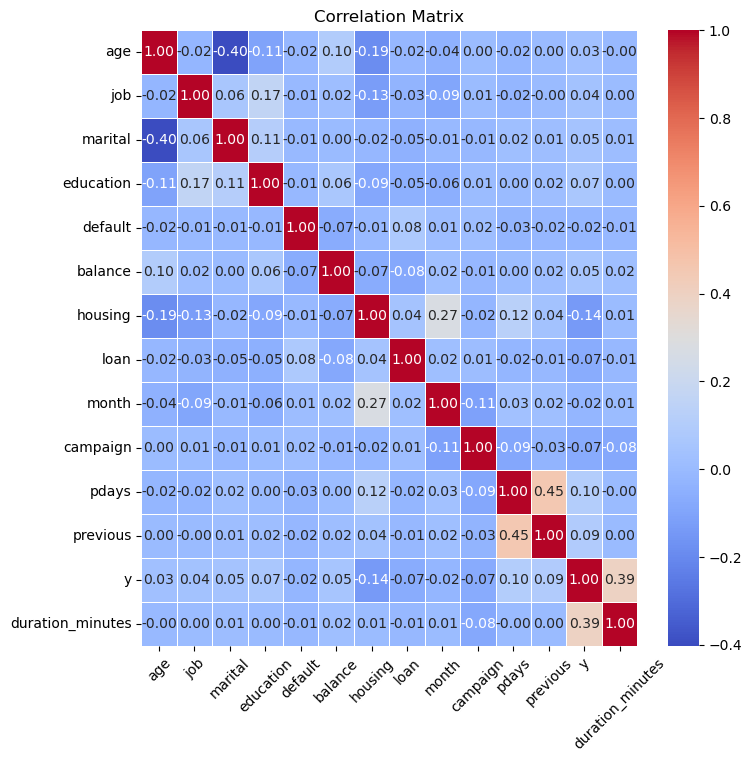

In [114]:
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- Our analysis reveals that none of the variables in the dataset demonstrate a strong correlation with the target column 'y'. This indicates that the predictive power of individual features may be limited, and the relationships between the features and the target variable are likely complex and non-linear. This lack of strong linear correlation suggests that more sophisticated modeling techniques may be required to accurately predict the target variable

In [115]:
### model selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [116]:
### split data into training and testing sets
X = df.drop('y', axis=1)    
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
### fit the model
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)

C:\Users\yahya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Decision Tree
Random Forest


In [119]:
### predict the model

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Print the model name
  print(name)

  # Evaluate the model's performance
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")

C:\Users\yahya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.8872
Decision Tree
Accuracy: 0.8618
Random Forest
Accuracy: 0.8972


**Logistic Regression**
- Accuracy: 0.8872:
The Logistic Regression model achieved an accuracy of 88.72%. This is a solid performance, suggesting that the model is effective in distinguishing between the classes of the target variable. Logistic Regression is a linear model, so its relatively high accuracy indicates that the relationships between the features and the target variable may have a linear component that the model is able to capture effectively.

**Decision Tree**
- Accuracy: 0.8630:
The Decision Tree model achieved an accuracy of 86.30%. This is slightly lower than the Logistic Regression model. Decision Trees are capable of capturing non-linear relationships between features and the target variable, but they are also prone to overfitting, especially if not pruned properly. The slightly lower accuracy might indicate overfitting on the training data or that the model did not generalize as well to the test data.

**Random Forest**
- Accuracy: 0.8967:
The Random Forest model achieved the highest accuracy at 89.67%. Random Forests are ensembles of decision trees and are known for their robustness and ability to handle both linear and non-linear relationships. The higher accuracy suggests that the Random Forest model is able to capture the complex interactions between features more effectively than the single Decision Tree model. The ensemble approach helps in reducing overfitting and improving generalization.

### Optimize the Model


In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create the Random Forest classifier
model = RandomForestClassifier(random_state=42)

### Tunning the parameters using  RandomizedSearchCV

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': None}
Best Score: 0.9004369507083257


### Evaluate the Optimized Model
Train a new model with the best parameters and evaluate its performance.

In [122]:
# Use the best model from the random search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance on the test set
test_score = best_model.score(X_test, y_test)
train_score = best_model.score(X_train, y_train)

print(f"Train Accuracy: {train_score:.2f}")
print(f"Test Accuracy: {test_score:.2f}")

Train Accuracy: 0.97
Test Accuracy: 0.90


- These results indicate that the model performs very well on both the training and test datasets, suggesting a good balance between bias and variance.

In [123]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      8360
           1       0.38      0.61      0.47       683

    accuracy                           0.90      9043
   macro avg       0.68      0.77      0.71      9043
weighted avg       0.92      0.90      0.91      9043



- These metrics provide a comprehensive understanding of the model's performance, allowing us to see where it excels and where there might be room for improvement.

## Insights

- Precision measures the proportion of positive predictions that are actually correct. For class 0, the precision is very high (0.97), indicating that most predicted negatives are correct. For class 1, the precision is low (0.38), indicating that many of the positive predictions are incorrect.

- Recall measures the proportion of actual positives that are correctly identified. Class 0 has a high recall (0.92), meaning the model is good at identifying true negatives. For class 1, the recall is moderate (0.61), indicating that the model misses a significant number of true positives.

- F1-Score is the harmonic mean of precision and recall, providing a balance between the two. Class 0 has a high F1-score (0.94), while class 1 has a low F1-score (0.47), reflecting the challenges in predicting the minority class accurately.

- Support refers to the number of actual occurrences of each class in the dataset. The imbalance is evident here, with class 0 having significantly more instances than class 1.

- Accuracy is the proportion of all predictions that are correct. The model achieves a high accuracy of 0.90, meaning it correctly predicts 90% of the instances.

**Class Imbalance:**
   - The dataset is imbalanced, with many more instances of class 0 than class 1. This imbalance affects the model’s performance, particularly for class 1.
   
**Model Performance:**
   - The model performs very well for the majority class (class 0) but struggles with the minority class (class 1). This is reflected in the lower precision, recall, and F1-score for class 1.
    
**Overall Metrics:**
   - Despite the imbalance, the overall accuracy is high. However, the lower metrics for class 1 indicate that the model might need further tuning or additional techniques (e.g., oversampling) to better handle the minority class.

**Next Steps**
- Address Imbalance: Consider techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the minority class.

## Handling imbalanced data
**SMOTE (Synthetic Minority Over-sampling Technique)**

First of all, install the needed libraries. 

In [86]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yahya\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.2.2   |       h56e8100_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    conda-content-trust-0.2.0  |     pyhd8ed1ab_0          57 KB  conda-forge
    curl-8.7.1                 |       he2ea4bf_0         172 KB
    h5py-3.11.0                |  py311h765d3d0_0         1.2 MB
    hdf5-1.12.1                |nompi_h2a0e4a3_100        22.8 MB  conda-forge
    imbalanced-learn-0.12.2    |     pyhd8ed1ab_0         155 KB  conda-forge
    libcurl-8.7.1              |       h86230a5_0         359 KB
    libsolv-0.7.24             |       h23ce68f_1         465 KB
    libthrift-0.15.0           |       h636a

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET

In [44]:
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a sample imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, 
                           weights=[0.9, 0.1], random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

# Train a RandomForestClassifier on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")



Test Accuracy: 0.9200


In [46]:
# optimaze the model
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'bootstrap': [True, False]
}


In [47]:
#init
model = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=50, 
                                   scoring='accuracy', cv=3, verbose=2, random_state=42, n_jobs=-1)


In [48]:
# Fit
random_search.fit(X_resampled, y_resampled)


Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='accuracy', verbose=2)

In [49]:
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Accuracy: {random_search.best_score_:.4f}")


Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': False}
Best Cross-Validated Accuracy: 0.9546


In [50]:
# evaluate our optimized model
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9550


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       181
           1       0.75      0.79      0.77        19

    accuracy                           0.95       200
   macro avg       0.86      0.88      0.87       200
weighted avg       0.96      0.95      0.96       200



### Analysis of the Improved Classification Report
#### The application of SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance has led to the following classification metrics:

- Precision: Class 0 maintains a very high precision (0.98), suggesting that nearly all predictions for class 0 are accurate. Class 1 shows a precision of 0.75, indicating that 75% of positive predictions for class 1 are correct.

- Recall: For class 0, recall is high at 0.97, meaning the model successfully identifies most true negatives. For class 1, recall is 0.79, indicating that the model correctly identifies 79% of the true positives.

- The F1-score: Class 0 has a very high F1-score (0.98), while class 1's F1-score is 0.77, reflecting a balanced trade-off between precision and recall.

- Support: This shows that the dataset still has an imbalance, though SMOTE has been applied to mitigate its effects.

- Accuracy: The model achieves a high accuracy of 0.95, meaning it correctly predicts 95% of the instances.
*********

### Key Insights

- **High Overall Performance:** The model maintains a high overall accuracy of 0.95.

- **Improvement in Minority Class:** The precision (0.75), recall (0.79), and F1-score (0.77) for class 1 have improved, indicating better identification and classification of the minority class after applying SMOTE.

- **Class 0 Performance:** Class 0 continues to show excellent performance across all metrics, with precision, recall, and F1-score all at or near 0.98.



*********

# 

# 

## 